In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
McDonalds_data=pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")

In [3]:
McDonalds_data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
McDonalds_data.shape

(1453, 15)

In [5]:
McDonalds_data.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [6]:
McDonalds_data.nunique()

yummy              2
convenient         2
spicy              2
fattening          2
greasy             2
fast               2
cheap              2
tasty              2
expensive          2
healthy            2
disgusting         2
Like              11
Age               54
VisitFrequency     6
Gender             2
dtype: int64

In [7]:
mask_cat = McDonalds_data.dtypes == object
cat_cols = McDonalds_data.columns[mask_cat]
for col in cat_cols:
    unique_values = McDonalds_data[col].unique()
    print(col)
    print(unique_values)

yummy
['No' 'Yes']
convenient
['Yes' 'No']
spicy
['No' 'Yes']
fattening
['Yes' 'No']
greasy
['No' 'Yes']
fast
['Yes' 'No']
cheap
['Yes' 'No']
tasty
['No' 'Yes']
expensive
['Yes' 'No']
healthy
['No' 'Yes']
disgusting
['No' 'Yes']
Like
['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1']
VisitFrequency
['Every three months' 'Once a week' 'Once a month' 'Once a year'
 'More than once a week' 'Never']
Gender
['Female' 'Male']


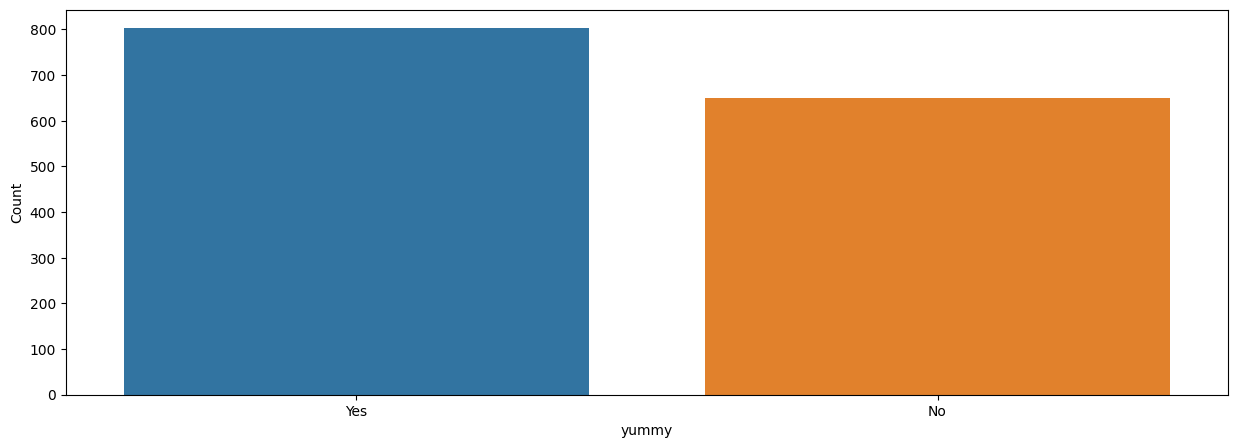

<Figure size 640x480 with 0 Axes>

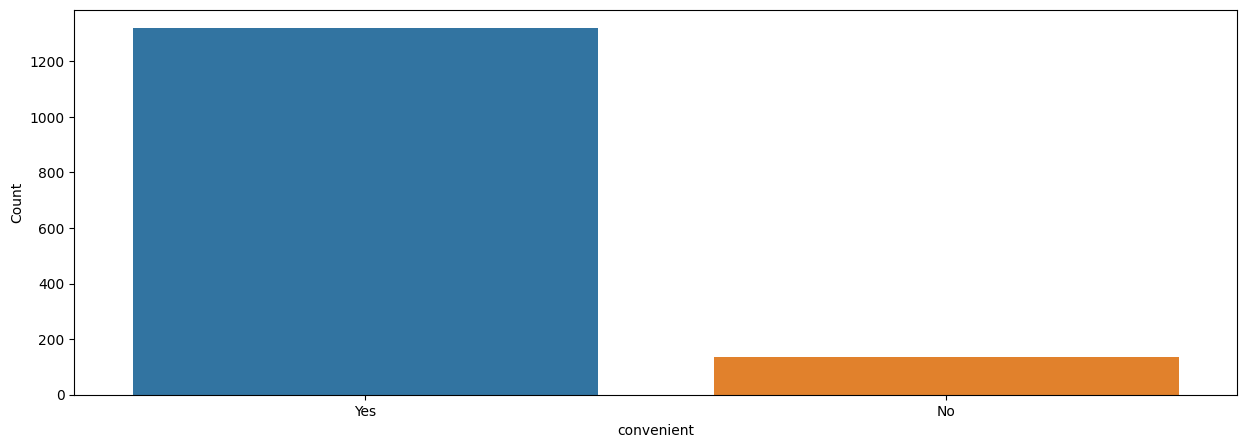

<Figure size 640x480 with 0 Axes>

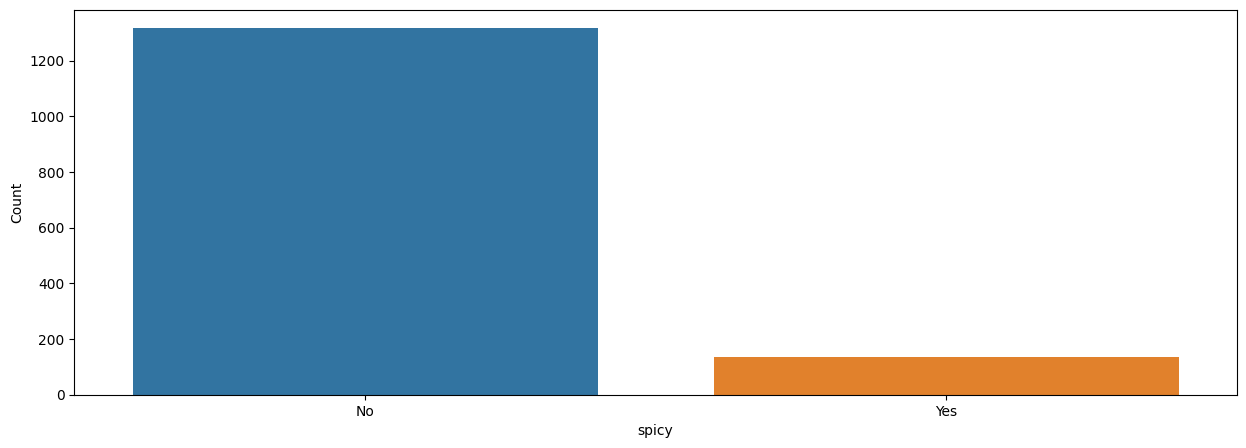

<Figure size 640x480 with 0 Axes>

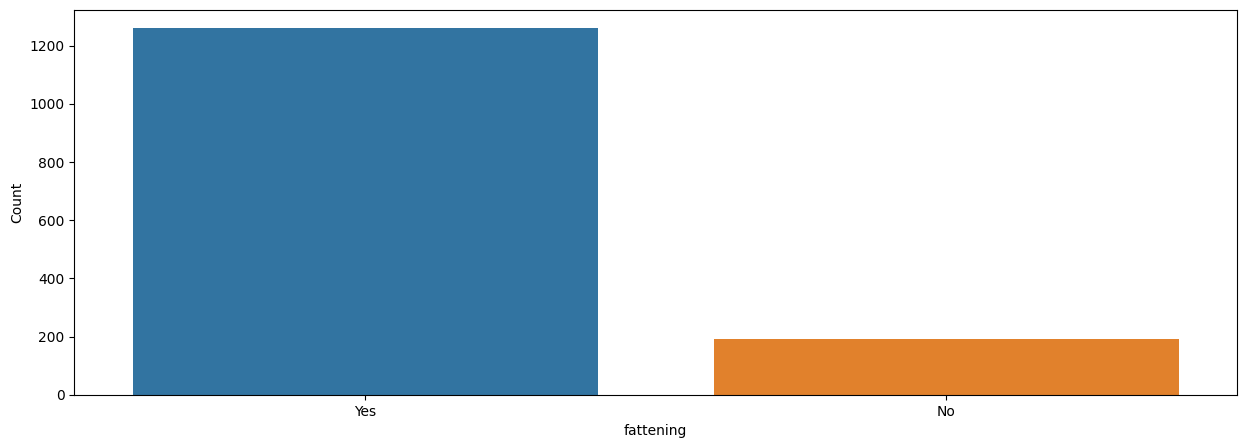

<Figure size 640x480 with 0 Axes>

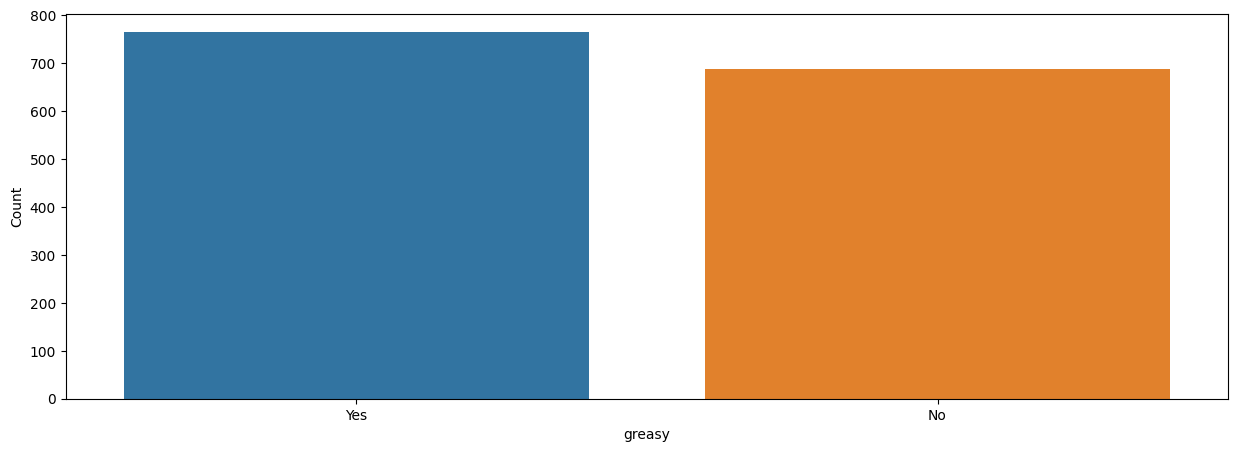

<Figure size 640x480 with 0 Axes>

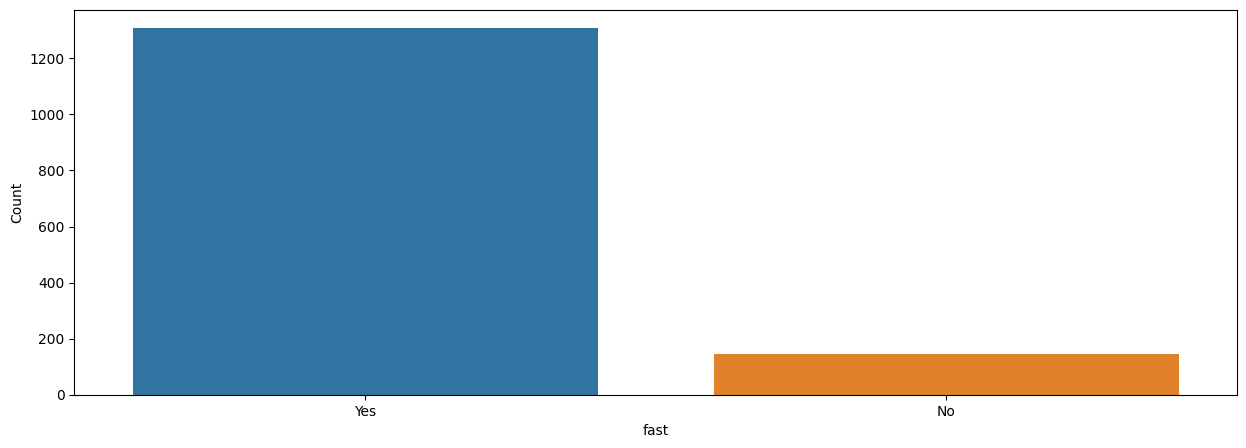

<Figure size 640x480 with 0 Axes>

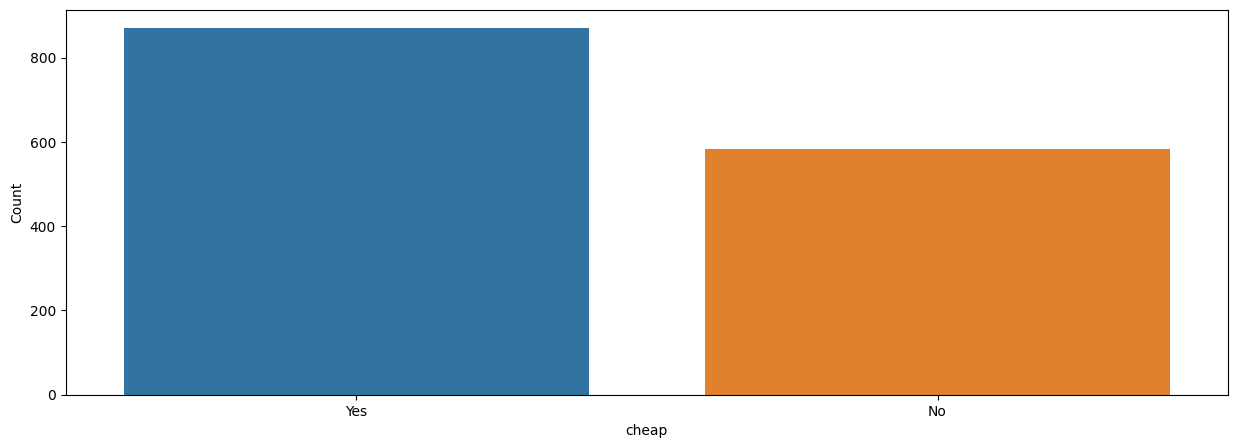

<Figure size 640x480 with 0 Axes>

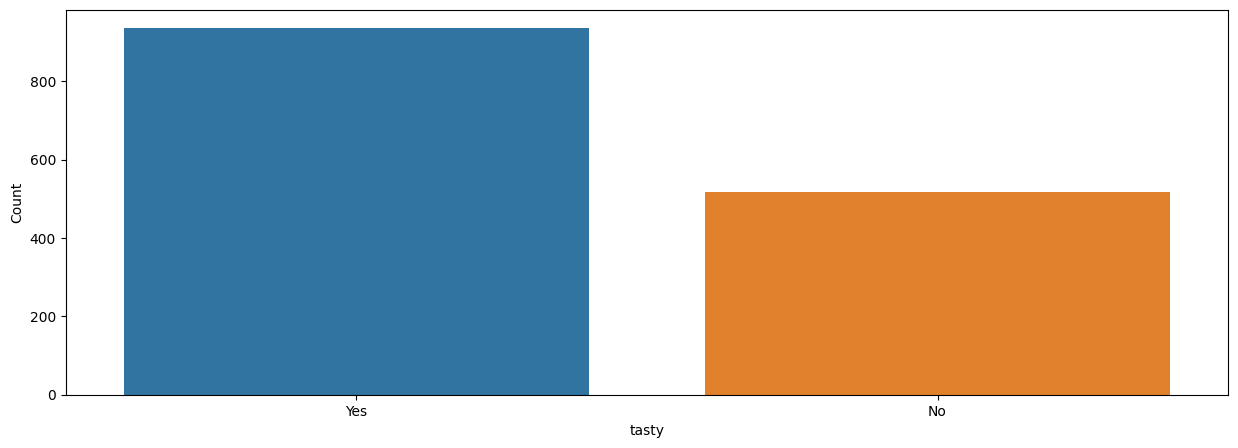

<Figure size 640x480 with 0 Axes>

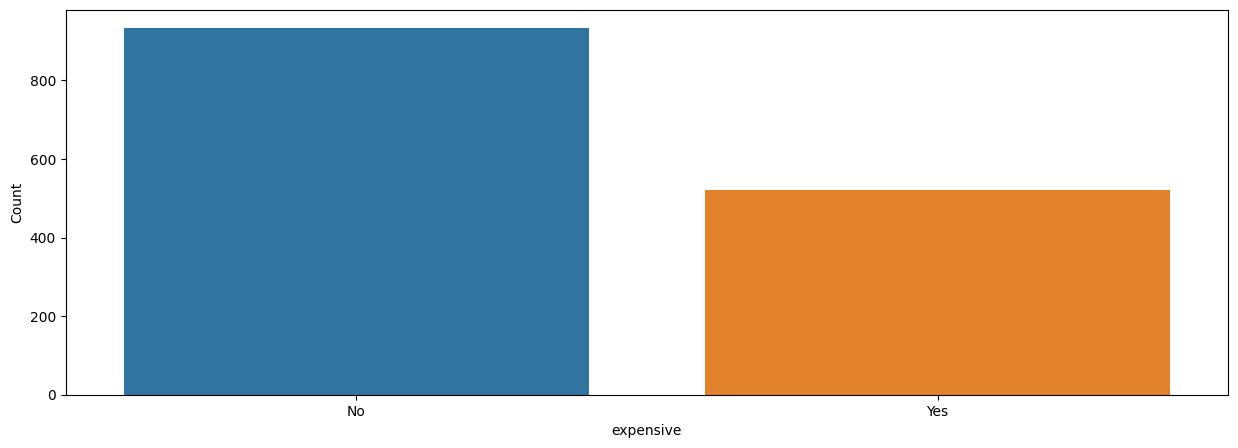

<Figure size 640x480 with 0 Axes>

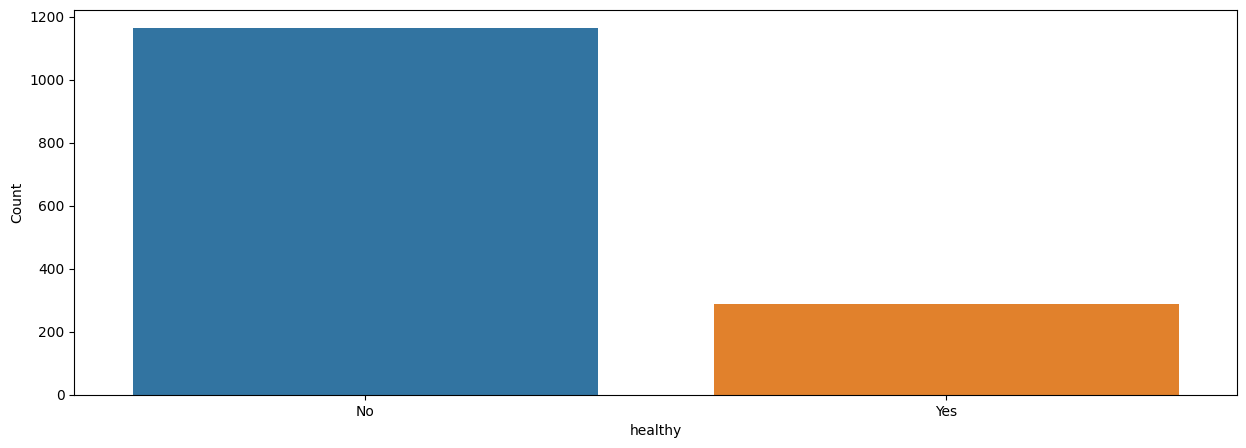

<Figure size 640x480 with 0 Axes>

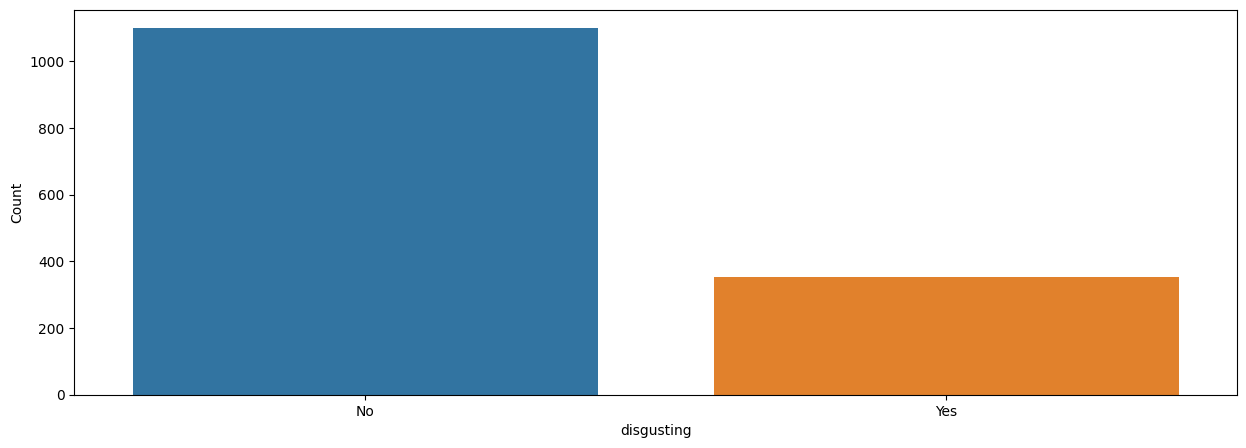

<Figure size 640x480 with 0 Axes>

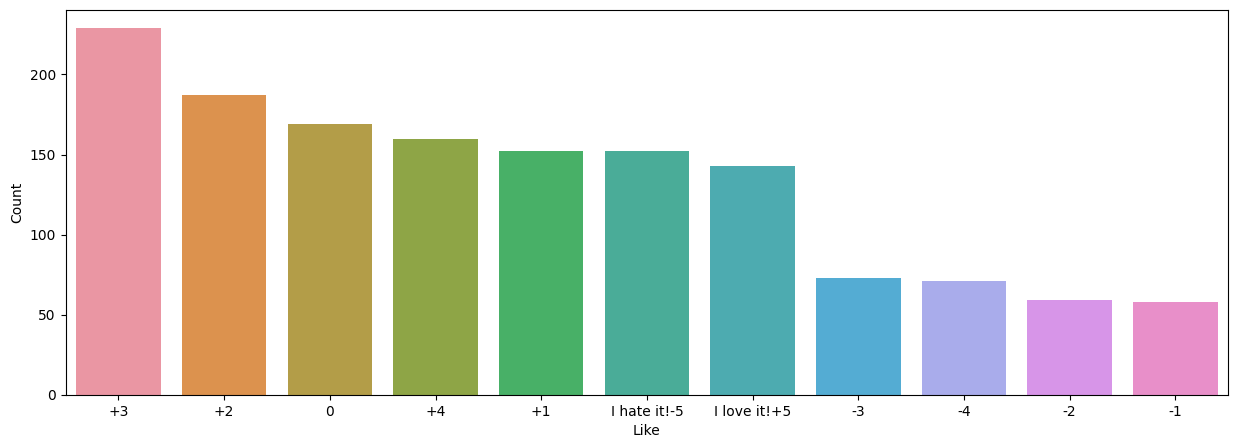

<Figure size 640x480 with 0 Axes>

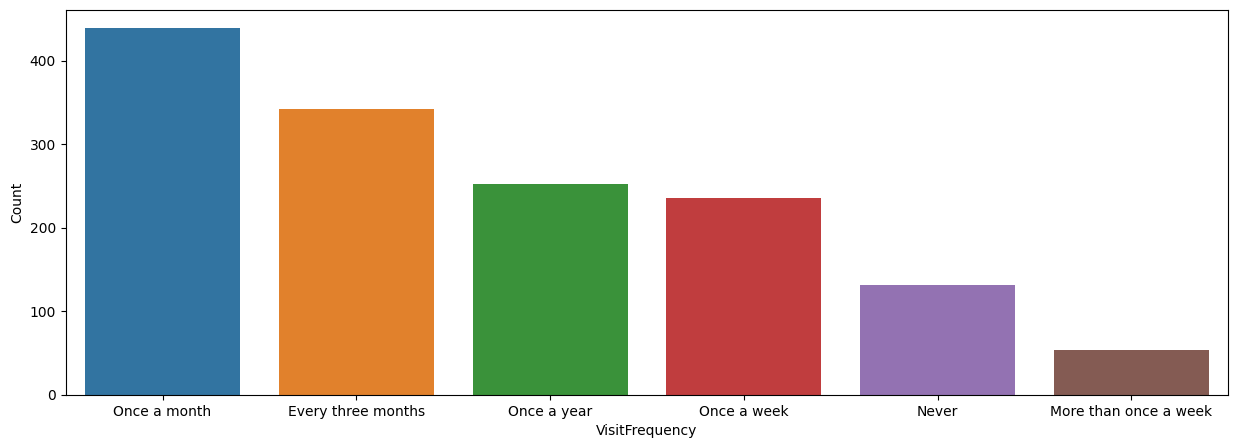

<Figure size 640x480 with 0 Axes>

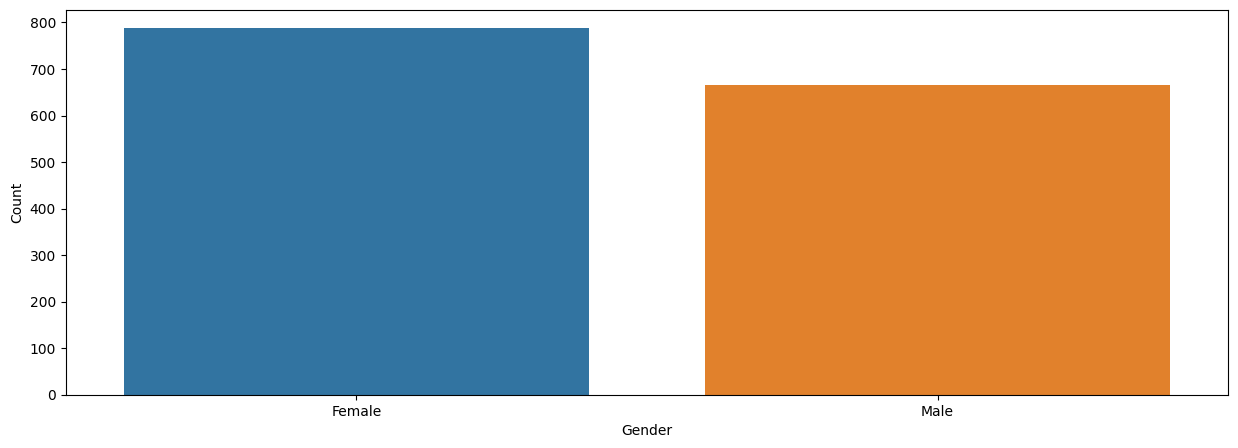

<Figure size 640x480 with 0 Axes>

In [8]:
for col in cat_cols:
    fig, ax = plt.subplots(figsize = (15,5))
    plt1 = sns.countplot(data=McDonalds_data, x=col, order=McDonalds_data[col].value_counts().index)
    plt1.set(xlabel = col, ylabel= 'Count')
    plt.show()
    plt.tight_layout()

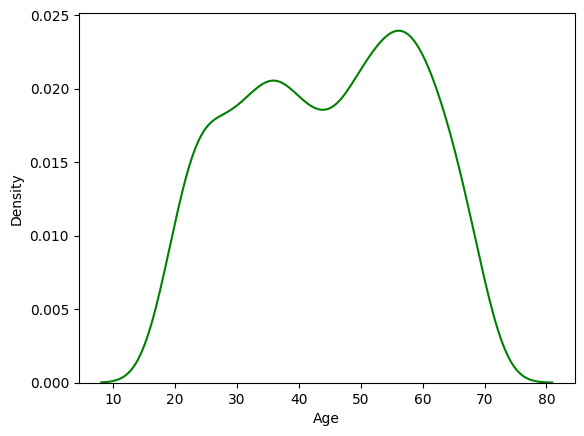

In [9]:
mask_numeric = McDonalds_data.dtypes != object
numeric_cols = McDonalds_data.columns[mask_numeric]
for col in numeric_cols:
    sns.kdeplot(McDonalds_data[col],color='green')
    plt.show()

In [10]:
df=McDonalds_data.iloc[:,:11]

In [11]:
label_encoder = LabelEncoder()
label_mappings = {}

# Fit the encoder on the training data
for col in df.columns:
    df[col] = label_encoder.fit_transform(df[col])
    df[col] = df[col]
    # Create a mapping of labels to original components
    label_mappings[col] = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
    print(col)
    print(label_mappings[col])

yummy
{'No': 0, 'Yes': 1}
convenient
{'No': 0, 'Yes': 1}
spicy
{'No': 0, 'Yes': 1}
fattening
{'No': 0, 'Yes': 1}
greasy
{'No': 0, 'Yes': 1}
fast
{'No': 0, 'Yes': 1}
cheap
{'No': 0, 'Yes': 1}
tasty
{'No': 0, 'Yes': 1}
expensive
{'No': 0, 'Yes': 1}
healthy
{'No': 0, 'Yes': 1}
disgusting
{'No': 0, 'Yes': 1}


In [12]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [13]:
df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
pca = PCA(n_components=11)
pca.fit(df)

PCA(n_components=11)

In [15]:
df_hat= pca.transform(df)

In [16]:
df_pca = pd.DataFrame(columns=[f'PC{i+1}' for i in range(len(df.columns))], data=df_hat)
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245


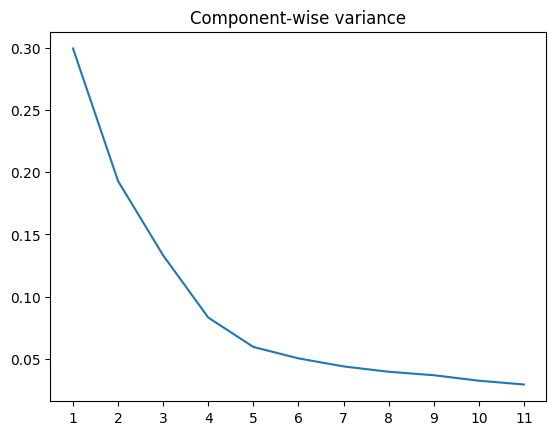

In [17]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.title("Component-wise variance")
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.show()

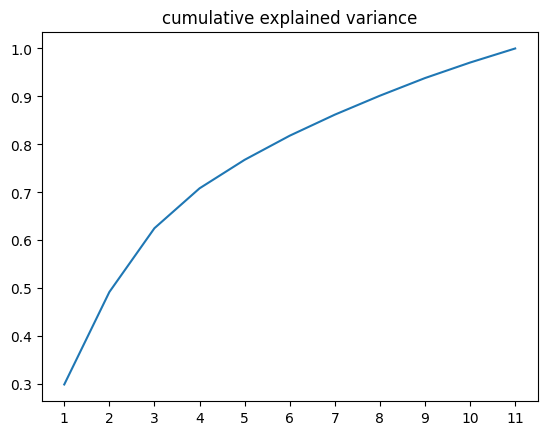

In [18]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.title("cumulative explained variance")
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.show()

In [19]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=[f'PC{i+1}' for i in range(len(df.columns))],  # so the columns are the principal components
    index=df.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069
healthy,-0.213711,0.076593,0.192051,0.763488,0.287846,-0.178226,-0.349616,0.176303,-0.185572,-0.038117,0.157608


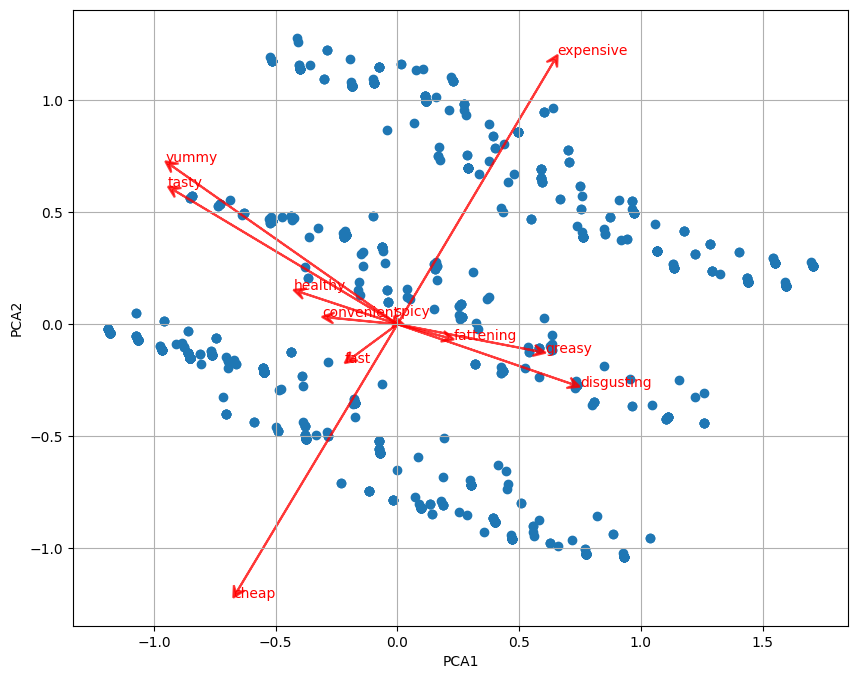

In [20]:
pca1 = df_pca['PC1']
pca2 = df_pca['PC2']

# Create a scatter plot of PCA1 and PCA2
plt.figure(figsize=(10, 8))
plt.scatter(pca1, pca2)
scaling_factor = 2
# Plot the original variables as vectors on the graph
for i, variable in enumerate(df.columns):
    x = 0  # Origin of the vector
    y = 0  # Origin of the vector
    dx =scaling_factor*loadings["PC1"][variable]  # Length and direction in PCA1
    dy = scaling_factor*loadings["PC2"][variable]  # Length and direction in PCA2
    plt.arrow(x, y, dx, dy, color='r', alpha=0.75, head_width=0.05, head_length=0.05, linewidth=1.5, length_includes_head=True, overhang=0.5, shape='full')
    plt.text(dx, dy, variable, color='r')

# Add labels and grid
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)

# Show the plot
plt.show()

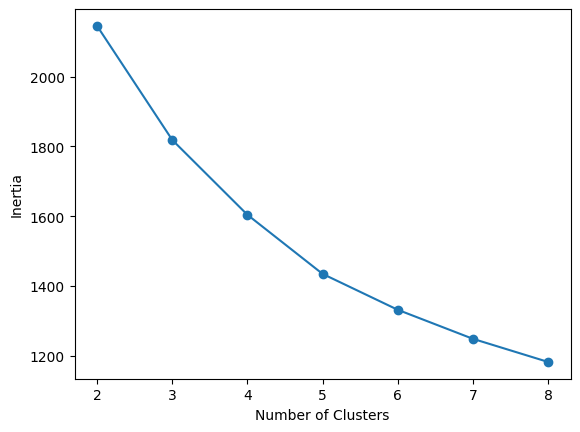

In [21]:
inertia = []
cluster_results = {}  # Dictionary to store the clustering results for different numbers of clusters
list_num_clusters = list(range(2,9))
for num_clusters in list_num_clusters:
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=1234, verbose=False)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
    cluster_results[num_clusters] = kmeans.labels_

# # Print the clustering results
# for n_clusters, labels in cluster_results.items():
#     print(f"Number of clusters: {n_clusters}")
#     print(f"Cluster labels: {labels}")
#     print()
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

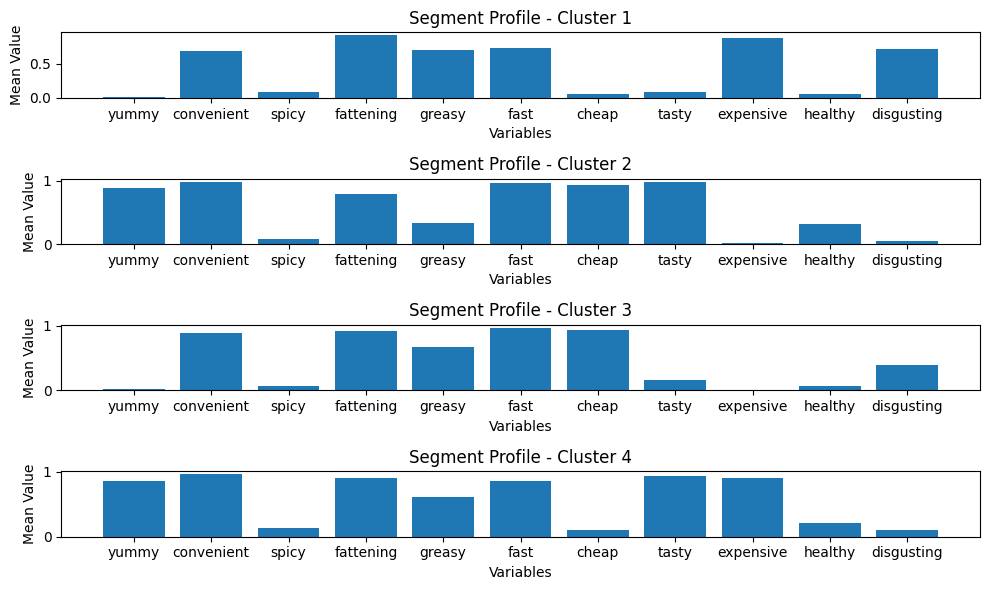

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Perform k-means clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=123,n_init=10)
cluster_labels = kmeans.fit_predict(df)

# Calculate the mean/centroid of each cluster
cluster_centers = kmeans.cluster_centers_

# Create a DataFrame for the cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers, columns=df.columns)

# Plot segment profile for each cluster
plt.figure(figsize=(10, 6))

for i in range(n_clusters):
    plt.subplot(n_clusters, 1, i+1)
    plt.bar(df.columns, cluster_centers_df.loc[i])
    plt.xlabel("Variables")
    plt.ylabel("Mean Value")
    plt.title(f"Segment Profile - Cluster {i+1}")

plt.tight_layout()
plt.show()



C:\Users\Tuhina\anaconda3\envs\keras\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


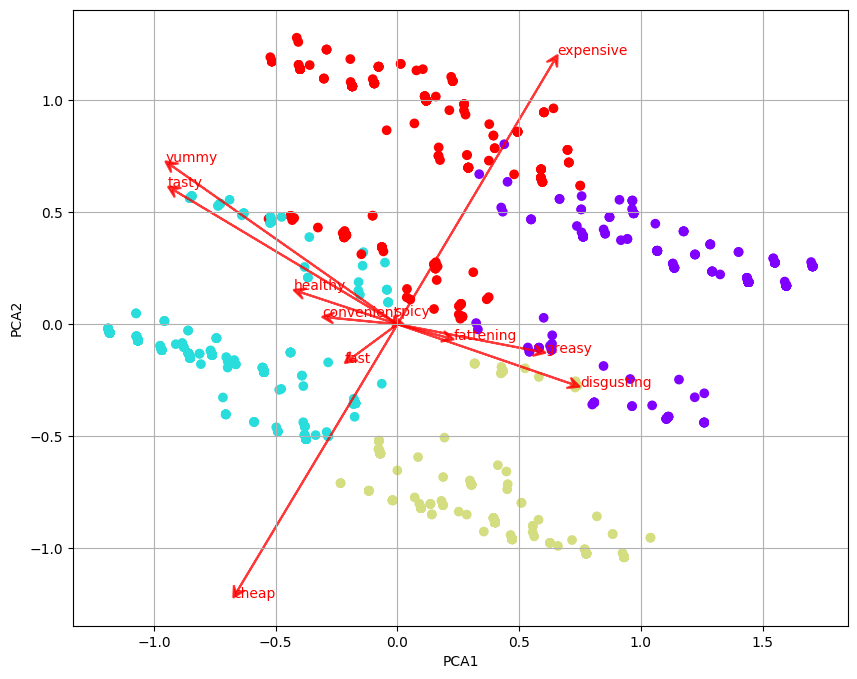

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Perform k-means clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=123)
cluster_labels = kmeans.fit_predict(df)

# PCA calculation and scatter plot
pca1 = df_pca['PC1']
pca2 = df_pca['PC2']

# Create a scatter plot of PCA1 and PCA2 with cluster colors
plt.figure(figsize=(10, 8))
plt.scatter(pca1, pca2, c=cluster_labels, cmap='rainbow')

scaling_factor = 2

# Plot the original variables as vectors on the graph
for i, variable in enumerate(df.columns):
    x = 0  # Origin of the vector
    y = 0  # Origin of the vector
    dx = scaling_factor * loadings["PC1"][variable]  # Length and direction in PCA1
    dy = scaling_factor * loadings["PC2"][variable]  # Length and direction in PCA2
    plt.arrow(x, y, dx, dy, color='r', alpha=0.75, head_width=0.05, head_length=0.05, linewidth=1.5, length_includes_head=True, overhang=0.5, shape='full')
    plt.text(dx, dy, variable, color='r')

# Add labels and grid
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)

# Show the plot
plt.show()
